In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

In [2]:
#load Data

Eth2=pd.read_csv('Eth_Cleaned.csv')

In [3]:
Eth2.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,year
0,2016-03-10,11.75,11.20,11.85,11.07,0.00000,4.91,2016,Mar,Thursday,2016
1,2016-03-11,11.95,11.75,11.95,11.75,0.00018,1.70,2016,Mar,Friday,2016
2,2016-03-12,12.92,11.95,13.45,11.95,0.00083,8.12,2016,Mar,Saturday,2016
3,2016-03-13,15.07,12.92,15.07,12.92,0.00130,16.64,2016,Mar,Sunday,2016
4,2016-03-14,12.50,15.07,15.07,11.40,0.09218,-17.05,2016,Mar,Monday,2016


In [4]:
#Checking for Null values
Eth2.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Year        0
Month       0
Day         0
year        0
dtype: int64

In [9]:
Eth2['year'] = Eth2['Year'].astype(str)

Since no null value, let's go on with EDA

In [10]:
Eth2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1964 non-null   object 
 1   Price     1964 non-null   float64
 2   Open      1964 non-null   float64
 3   High      1964 non-null   float64
 4   Low       1964 non-null   float64
 5   Vol.      1964 non-null   float64
 6   Change %  1964 non-null   float64
 7   Year      1964 non-null   int64  
 8   Month     1964 non-null   object 
 9   Day       1964 non-null   object 
 10  year      1964 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 168.9+ KB


# Exploratory Data Analysis

Text(0.5, 1.0, 'Quantity traded in Days')

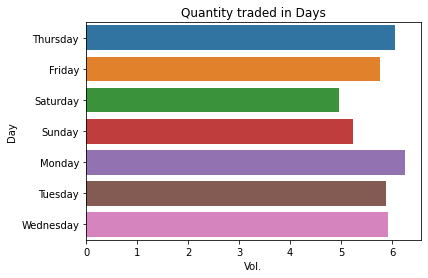

In [11]:
#Comparing Volume and day
ax=sns.barplot(y="Day",x="Vol.",data=Eth2,ci=None)
ax.set_title('Quantity traded in Days')

Text(0.5, 1.0, 'Quantity traded in Months')

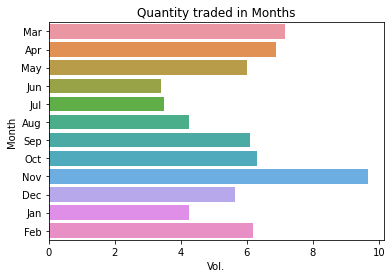

In [12]:
ax=sns.barplot(y="Month",x="Vol.",data=Eth2,ci=None)
ax.set_title('Quantity traded in Months')

Text(0.5, 1.0, 'Quantity traded in Years')

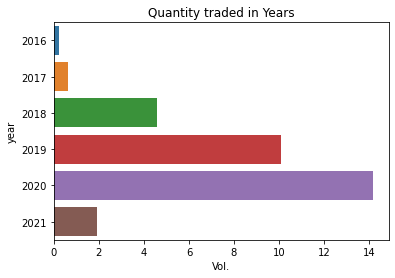

In [13]:
ax=sns.barplot(y="year",x="Vol.",data=Eth2,ci=None)
ax.set_title('Quantity traded in Years')

Text(0.5, 1.0, 'Price Over the Years')

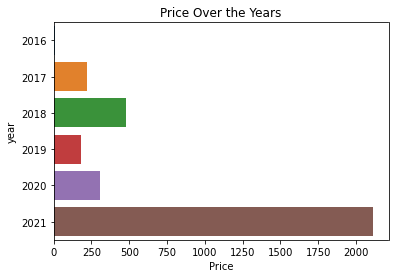

In [14]:
ax=sns.barplot(y="year",x="Price",data=Eth2,ci=None)
ax.set_title('Price Over the Years')

In [15]:
#Making the Date the index
Eth2=Eth2.set_index('Date')

In [16]:
Eth2.head()

,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,year
Date,,,,,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.00000,4.91,2016,Mar,Thursday,2016
2016-03-11,11.95,11.75,11.95,11.75,0.00018,1.70,2016,Mar,Friday,2016
2016-03-12,12.92,11.95,13.45,11.95,0.00083,8.12,2016,Mar,Saturday,2016
2016-03-13,15.07,12.92,15.07,12.92,0.00130,16.64,2016,Mar,Sunday,2016
2016-03-14,12.50,15.07,15.07,11.40,0.09218,-17.05,2016,Mar,Monday,2016


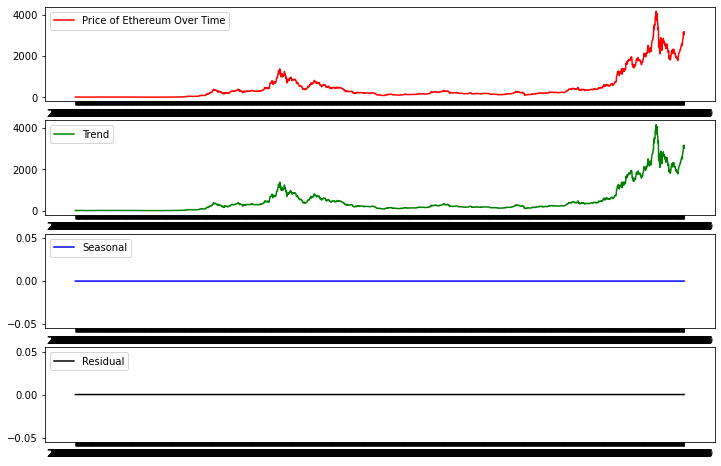

In [18]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(Eth2['Price'],  
                            model ='additive',period=1)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Eth2['Price'], label='Price of Ethereum Over Time', color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='black')
plt.legend(loc='upper left')
plt.show()